In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import keras
from keras import utils
from keras.utils import to_categorical

Using TensorFlow backend.


In [3]:
with open("/content/drive/My Drive/fer2013.csv") as f:
  content = f.readlines()
 
  lines = np.array(content)
 
  num_of_instances = lines.size
print("number of instances: ",num_of_instances)

number of instances:  35888


In [0]:
import PIL
from PIL import Image

In [4]:
x_train, y_train, x_test, y_test = [], [], [], []
 
for i in range(1,num_of_instances):

  emotion, img, usage = lines[i].split(",")
 
  val = img.split(" ")
  pixels = np.array(val, 'float32')
 
  emotion = keras.utils.to_categorical(emotion, num_classes=7)
 
  if 'Training' in usage:
   y_train.append(emotion)
   x_train.append(pixels)
  elif 'PublicTest' in usage:
   y_test.append(emotion)
   x_test.append(pixels)
  print("", end="")

x_train, x_test=np.array([x_train]),np.array([x_test])
x_train.shape,x_test.shape

((1, 28709, 2304), (1, 3589, 2304))

In [0]:
x_train=np.array(x_train)/255.
x_train=x_train.reshape(-1,48,48,1)
x_test=np.array(x_test)/255.
x_test=x_test.reshape(-1,48,48,1)

In [0]:
y_train=np.array(y_train)
y_test=np.array(y_test)

In [7]:
x_train.shape,y_train.shape

((28709, 48, 48, 1), (28709, 7))

In [8]:
x_test.shape,y_test.shape

((3589, 48, 48, 1), (3589, 7))

In [9]:
x_train

array([[[[0.27450982],
         [0.3137255 ],
         [0.32156864],
         ...,
         [0.20392157],
         [0.16862746],
         [0.16078432]],

        [[0.25490198],
         [0.23921569],
         [0.22745098],
         ...,
         [0.21960784],
         [0.20392157],
         [0.17254902]],

        [[0.19607843],
         [0.16862746],
         [0.21176471],
         ...,
         [0.19215687],
         [0.21960784],
         [0.18431373]],

        ...,

        [[0.35686275],
         [0.25490198],
         [0.16470589],
         ...,
         [0.28235295],
         [0.21960784],
         [0.16862746]],

        [[0.3019608 ],
         [0.32156864],
         [0.30980393],
         ...,
         [0.4117647 ],
         [0.27450982],
         [0.18039216]],

        [[0.3019608 ],
         [0.28235295],
         [0.32941177],
         ...,
         [0.41568628],
         [0.42745098],
         [0.32156864]]],


       [[[0.5921569 ],
         [0.5882353 ],
         [0.57

In [10]:
y_train.shape

(28709, 7)

In [11]:
y_test.shape

(3589, 7)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,Conv2D,MaxPooling2D,AveragePooling2D,Flatten,BatchNormalization,SeparableConv2D,GlobalAveragePooling2D
from keras import optimizers
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

In [0]:
data_gen = ImageDataGenerator(
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True)

In [14]:
model = Sequential()
 
#1st convolution layer
model.add(Conv2D(8, (3, 3),strides=(1,1), activation='relu', input_shape=(48,48,1)))
model.add(BatchNormalization())
#2nd convolution layer
model.add(Conv2D(8, (3, 3),strides=(1,1), activation='relu'))
model.add(BatchNormalization())
#model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
 
#3rd convolution layer
model.add(Conv2D(16, (1, 1),padding='same', activation='relu'))
model.add(BatchNormalization())
#4th convolution layer
model.add(SeparableConv2D(16, (3,3),padding='same', activation='relu'))
model.add(BatchNormalization())
#5th convolution layer
model.add(SeparableConv2D(16, (3,3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=(2, 2),padding='same'))
 
#6th convolution layer
model.add(Conv2D(32, (1, 1),padding='same', activation='relu'))
model.add(BatchNormalization())
#7th convolution layer
model.add(SeparableConv2D(32, (3,3),padding='same', activation='relu'))
model.add(BatchNormalization())
#8th convolution layer
model.add(SeparableConv2D(32, (3,3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=(2, 2),padding='same'))

#9th convolution layer
model.add(Conv2D(64, (1, 1),padding='same', activation='relu'))
model.add(BatchNormalization())
#10th convolution layer
model.add(SeparableConv2D(64, (3,3),padding='same', activation='relu'))
model.add(BatchNormalization())
#11th convolution layer
model.add(SeparableConv2D(64, (3,3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=(2, 2),padding='same'))
#12th convolution layer
model.add(Conv2D(128, (1, 1),padding='same', activation='relu'))
model.add(BatchNormalization())
#13th convolution layer
model.add(SeparableConv2D(128, (3,3),padding='same', activation='relu'))
model.add(BatchNormalization())
#14th convolution layer
model.add(SeparableConv2D(128, (3,3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=(2, 2),padding='same'))

#15th convolution layer
model.add(Conv2D(7, (3, 3),padding='same',activation='softmax'))
model.add(GlobalAveragePooling2D())


model.summary()













Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 8)         80        
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 46, 8)         32        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 8)         584       
_________________________________________________________________
batch_normalization_2 (Batch (None, 44, 44, 8)         32        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 44, 44, 16)        144       
_________________________________________________________________
batch_normalization_3 (Batch (None, 44, 44, 16)        64        
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 44, 44

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
#model.fit_generator(data_gen.flow(x_train, y_train,batch_size=32),epochs=110, verbose=1,validation_data=(x_test,y_test))

In [0]:
model.load_weights('/content/drive/My Drive/my_model_weights.h5')

In [17]:
train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])
print(train_score)

Train loss: 0.7474423953202863
Train accuracy: 71.33651468201472
Test loss: 1.03864616951128
Test accuracy: 63.806074117013225
[0.7474423953202863, 0.7133651468201472]


In [0]:
model.save_weights('my_model_weights.h5')

In [0]:
dic={"angry": 0, "disgust":1, "fear": 2, "happy":3, "sad":4, "surprise":5, "neutral":6}

In [0]:
from keras.preprocessing.image import img_to_array
import imutils
import cv2
from google.colab.patches import cv2_imshow

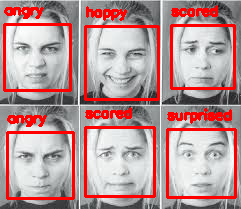

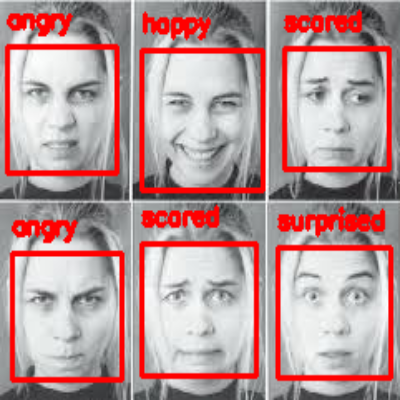

In [32]:
face_detection = cv2.CascadeClassifier('/content/drive/My Drive/haarcascade_frontalface_alt2.xml')
#emotion_classifier = load_model(emotion_model_path, compile=False)
EMOTIONS = ["angry","disgust","scared", "happy", "sad", "surprised","neutral"]
 
#reading the frame
orig_frame = cv2.imread('/content/drive/My Drive/images.jpg')
frame = cv2.imread('/content/drive/My Drive/images.jpg',0)
faces1 = face_detection.detectMultiScale(frame,scaleFactor=1.1,minNeighbors=5,minSize=(30,30),flags=cv2.CASCADE_SCALE_IMAGE)
for faces in faces1:
  if len(faces)>0:
      #faces = sorted(faces, reverse=True,key=lambda x: (x[2] - x[0]) * (x[3] - x[1]))[0]
      (fX, fY, fW, fH) = faces
      roi = frame[fY:fY + fH, fX:fX + fW]
      roi = cv2.resize(roi, (48, 48))
      roi = roi.astype("float") / 255.0
      roi = img_to_array(roi)
      roi = np.expand_dims(roi, axis=0)
      preds = model.predict(roi)[0]
      emotion_probability = np.max(preds)
      label = EMOTIONS[preds.argmax()]
      cv2.putText(orig_frame, label, (fX, fY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
      cv2.rectangle(orig_frame, (fX, fY), (fX + fW, fY + fH),(0, 0, 255), 2)
 
cv2_imshow(orig_frame)
cv2_imshow(cv2.resize(orig_frame,(400,400)))
#cv2.imwrite('test_output/'+img_path.split('/')[-1],orig_frame)

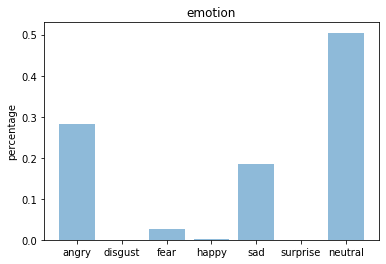

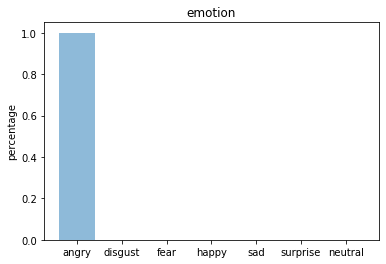

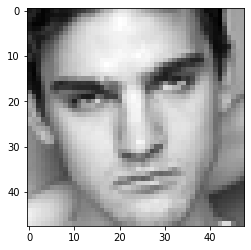

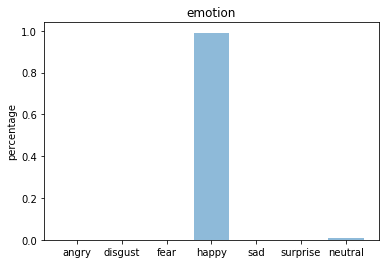

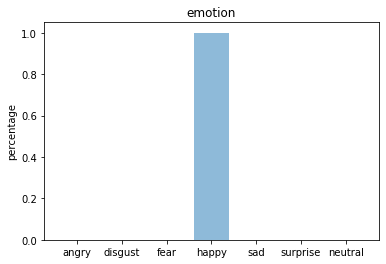

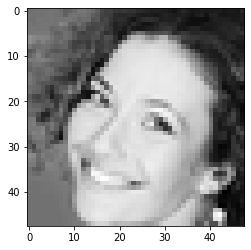

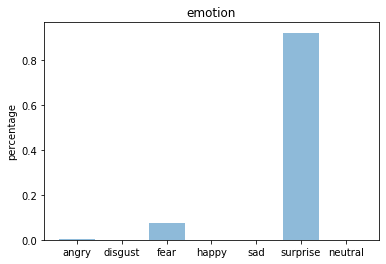

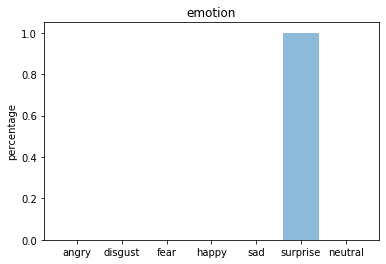

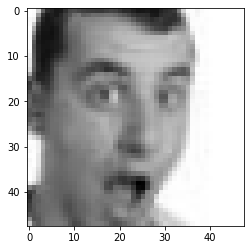

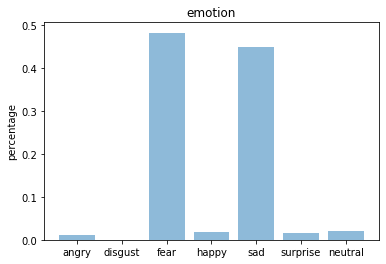

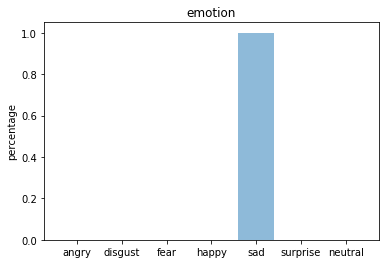

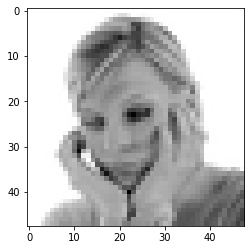

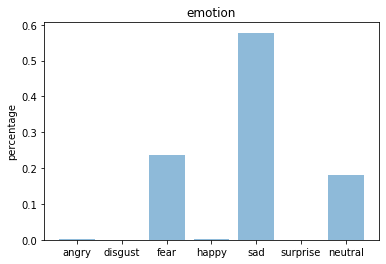

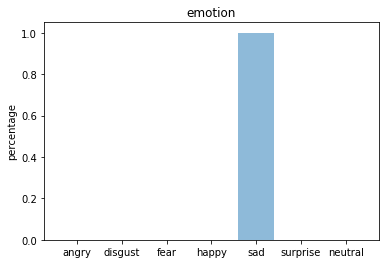

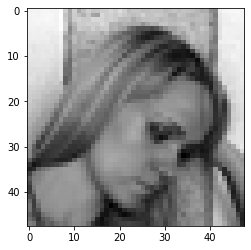

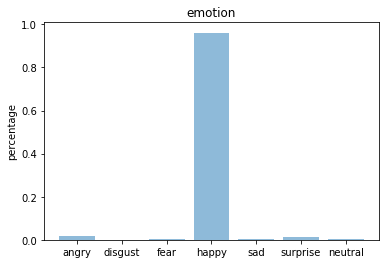

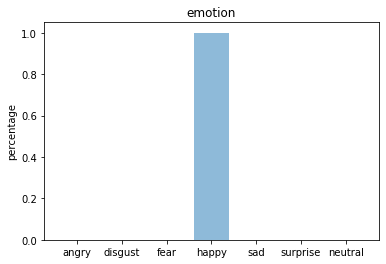

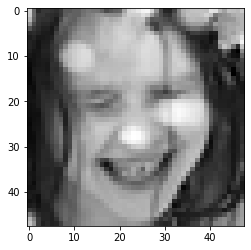

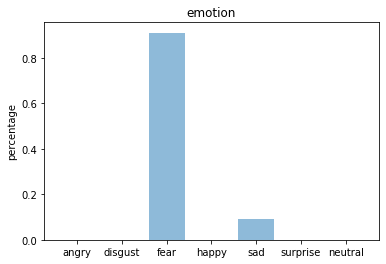

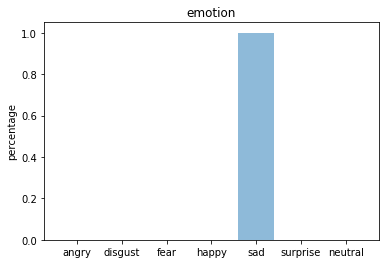

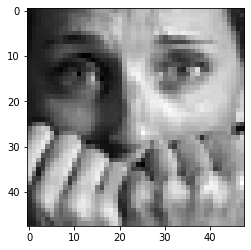

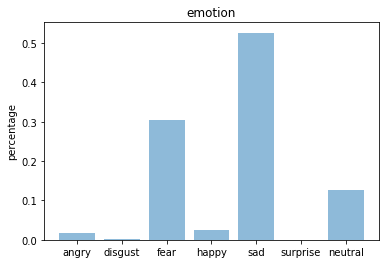

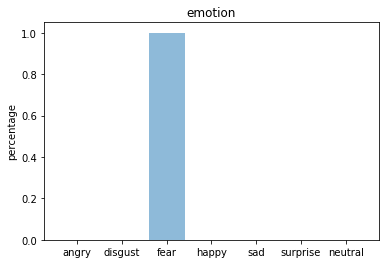

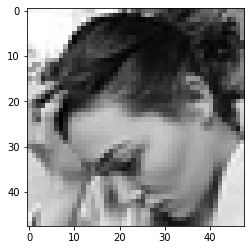

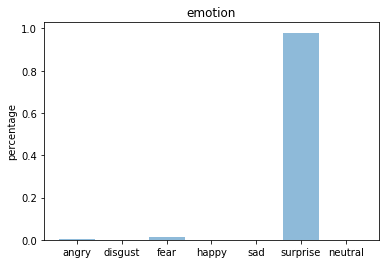

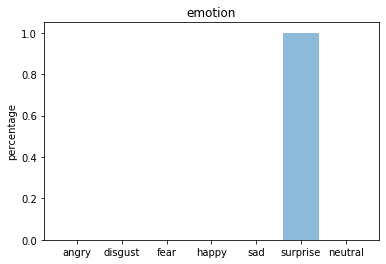

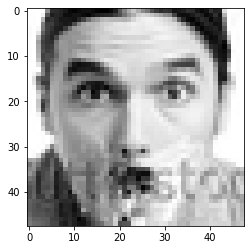

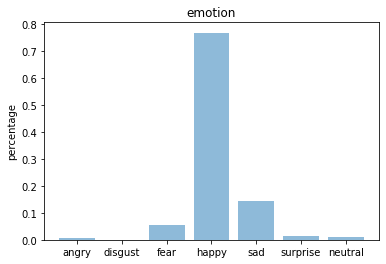

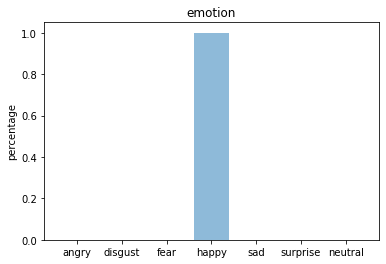

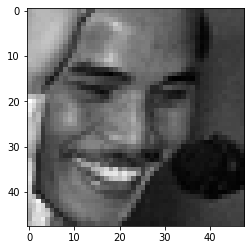

In [21]:
import cv2
'''
img = plt.imread("")
img=cv2.resize(img,(48,48))
x = cv2.cvtColor(np.array(img),cv2.COLOR_RGB2GRAY)
print(x.shape)
x = x/255.'''
#k=34
for k in range(50,60):
  x=x_test[k]
  custom = model.predict(x_test[k].reshape(1,48,48,1))
  #print(np.amax(custom))
  #result = np.where(custom == np.amax(custom))
  #print(result[1])
  
  emotion_analysis(custom[0])
  emotion_analysis(y_test[k])
  x = np.array(x, 'float32')
  x = x.reshape(48, 48);

  plt.gray()
  plt.imshow(x)
  plt.show()

In [0]:
import matplotlib.pyplot as plt
def emotion_analysis(emotions):
  objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
  y_pos = np.arange(len(objects))
  #print(object)
  plt.bar(y_pos, emotions, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('percentage')
  plt.title('emotion')
  
  plt.show()